In [1]:
from kandinsky import get_T2V_pipeline
from IPython.display import Video
from PIL import Image

/home/jovyan/.mlspace/envs/vladimir-cu12.6-torch2.6.0/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pipe = get_T2V_pipeline(
    device_map={"dit": "cuda:0", "vae": "cuda:1", "text_embedder": "cuda:2" },
)

Loading checkpoint shards: 100%|██████████| 5/5 [00:00<00:00,  6.48it/s]
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


# Video

In [3]:
out = pipe(["a cat in a red hat", "a cat in a blue hat"], time_length=2, width=768, height=512, save_path=['./test.mp4', './test1.mp4'])
out.shape

100%|██████████| 49/49 [02:07<00:00,  2.61s/it]


torch.Size([2, 3, 49, 512, 768])

In [4]:
Video('./test.mp4')

In [5]:
Video('./test1.mp4')

# Images

In [7]:
out = pipe(
    ["a dog in a red boots", "a dog in a blue boots", "a dog in a green boots"], 
    time_length=0, width=768, height=512, 
    save_path=['./image.png', './image1.png', './image2.png']
)
[x.size for x in out]

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


100%|██████████| 49/49 [00:10<00:00,  4.58it/s]


[(768, 512), (768, 512), (768, 512)]

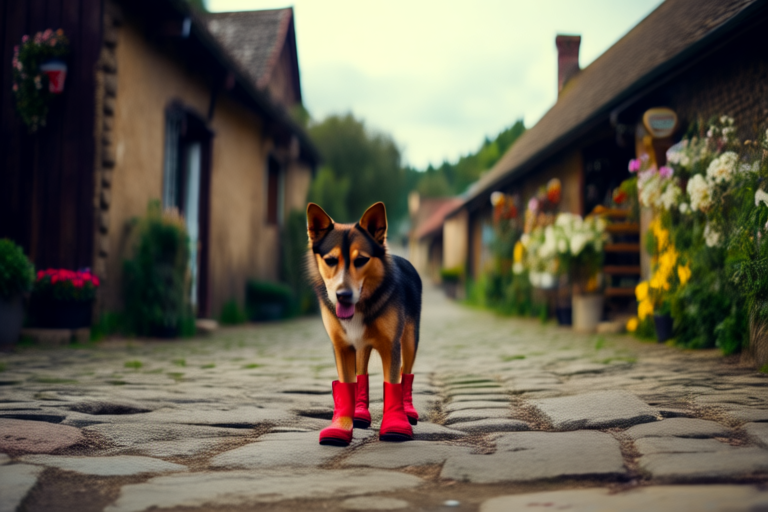

In [8]:
image = Image.open("./image.png")
image

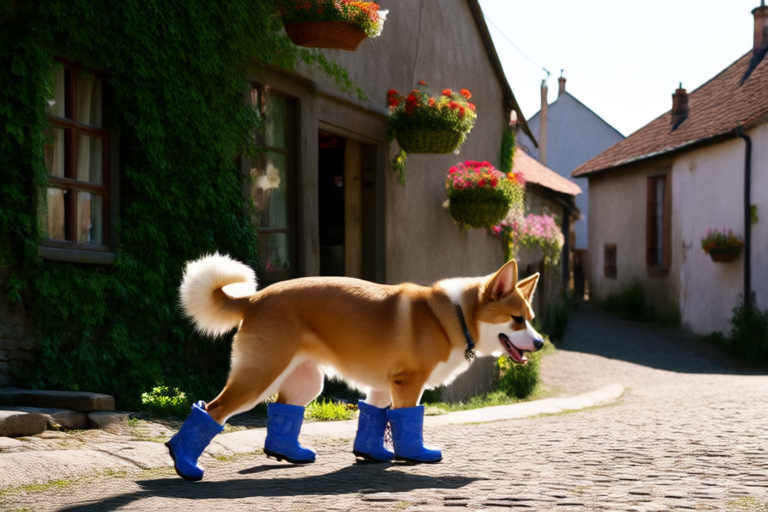

In [9]:
image = Image.open("./image1.png")
image

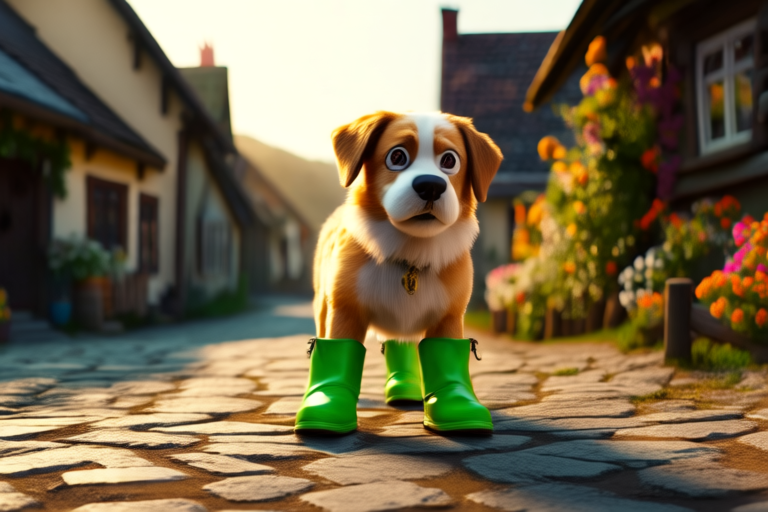

In [10]:
image = Image.open("./image2.png")
image